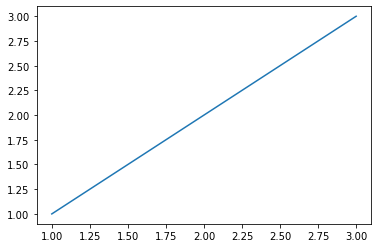

In [1]:
import matplotlib.pyplot as plt
x = [1,2,3]
y = [1,2,3]
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y)
plt.show()

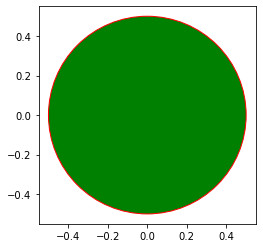

In [7]:
# drawing a circle

import matplotlib.pyplot as plt

def create_circle():
    circle = plt.Circle((0,0), radius = 0.5, fc = 'g', ec = 'r')
    return circle 

def show_shape(patch):
    ax = plt.gca()
    ax.add_patch(patch)
#     ax.set_aspect('equal')
    plt.axis('scaled')        #called the axis by scaled parameter
    plt.show()
    
if __name__ == "__main__":
    c = create_circle()
    show_shape(c)

<IPython.core.display.Javascript object>


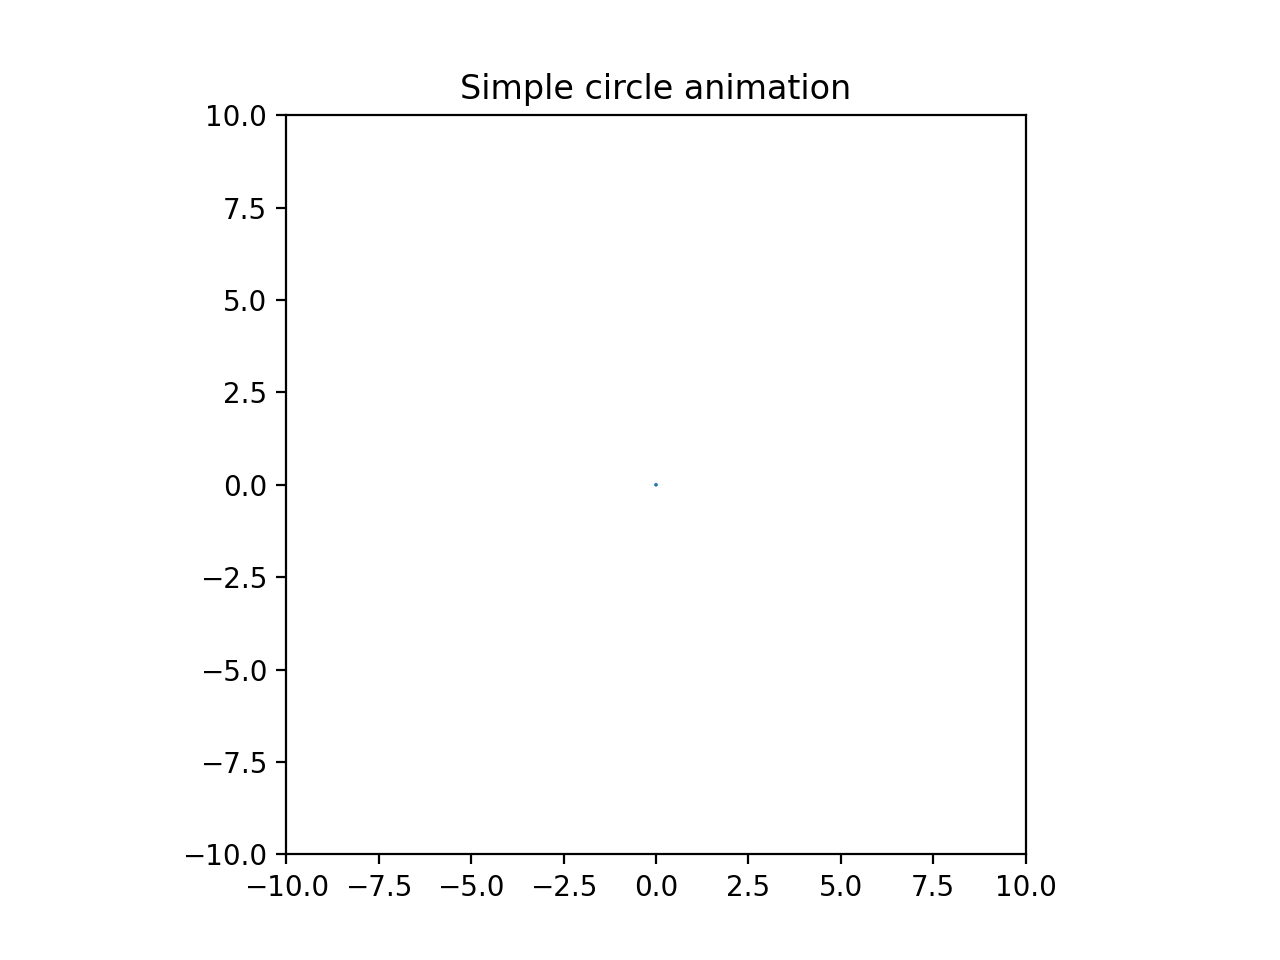

In [21]:
''''creating animated figures
    - a growing circle'''

%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import animation

def create_circle():
    circle = plt.Circle((0,0), 0.05)
    return circle

def update_radius(i, circle):
    circle.radius = i*2
    return circle,

def create_animation():
    fig = plt.gcf()
    ax = plt.axes(xlim = (-10,10), ylim = (-10,10))
    ax.set_aspect('equal')
    circle = create_circle()
    ax.add_patch(circle)
    
    anim = animation.FuncAnimation(fig, update_radius , fargs = (circle,),frames = 10, interval = 0.005)
    
    plt.title("Simple circle animation")
    plt.show()
    
if __name__ == "__main__":
    create_animation()

update_radius - 
This function will be responsible for drawing every frame. It takes two arguments—a frame number that is automatically passed to it when called and the patch object that we want to update every frame. This function also must return the object.

fargs - 
This tuple consists of all the arguments to be passed to the update_radius() function other than the frame number. If there are no such arguments to pass, this keyword argument need not be specified.

frames - 
This is the number of frames in the animation. Our function update_radius() is called this many times. Here, we’ve arbitrarily chosen 30 frames.


interval - 
This is the time interval in milliseconds between two frames. If your animation seems too slow, decrease this value; if it seems too fast, increase this value.

Enter the initial velocity (m/s):45
Enter the angle of throw (degrees): 50


<IPython.core.display.Javascript object>


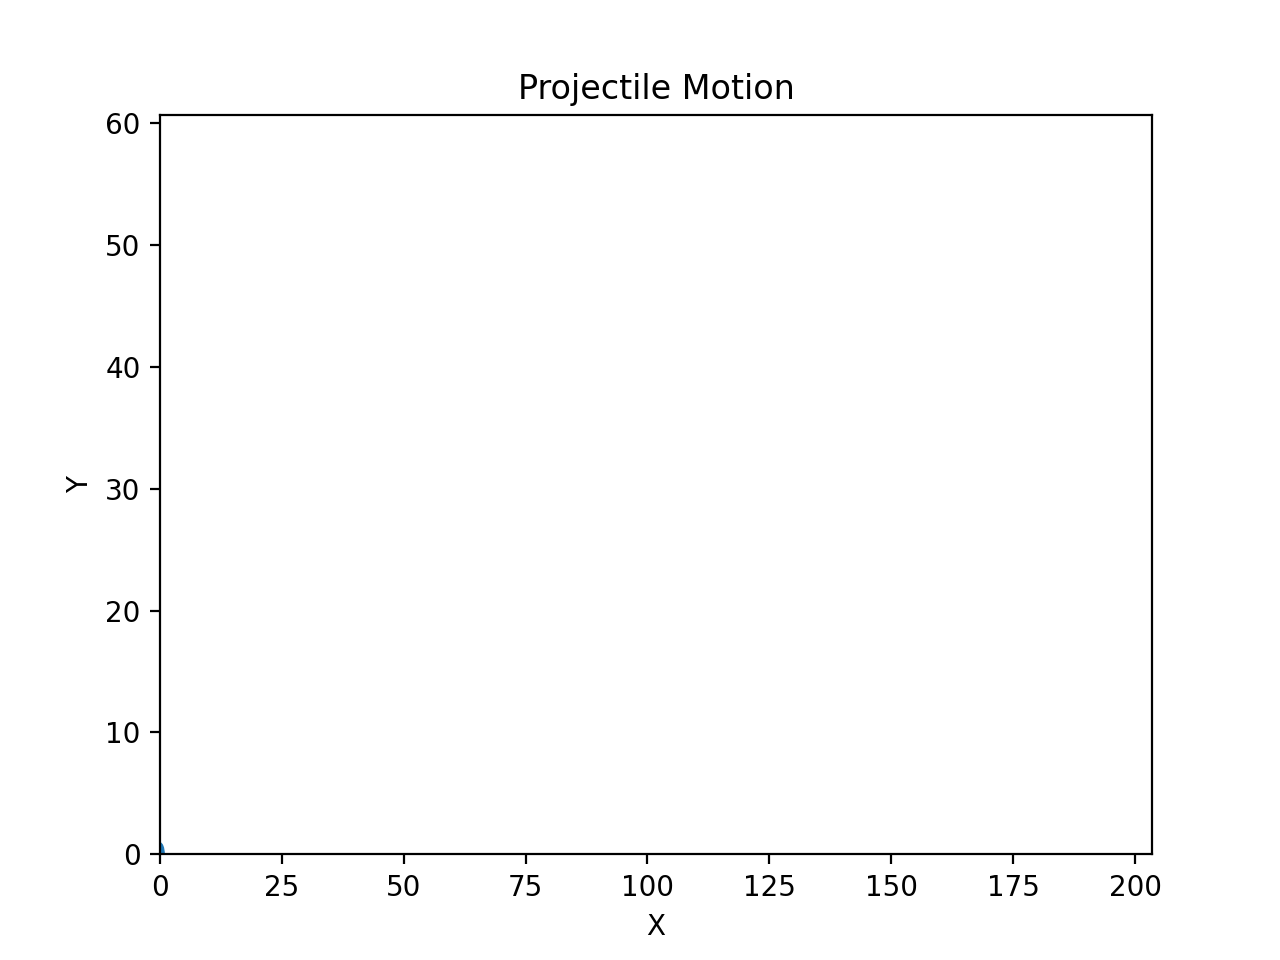

In [20]:
# animating a projectile trajectory

%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib import animation
import math

g = 9.8

def get_intervals(u, theta):
    
    t_flight = 2*u*math.sin(theta)/g
    intervals = []
    start = 0
    interval = 0.005
    while start < t_flight:
        intervals.append(start)
        start = start + interval
    
    return intervals

def update_position(i, circle, intervals, u, theta):
    
    t = intervals[i]
    x = u*math.cos(theta)*t
    y = u*math.sin(theta)*t - 0.5*g*t*t
    circle.center = x,y
    return circle,

def create_animation(u, theta):
    
    intervals = get_intervals(u, theta)
    
    xmin = 0
    xmax = u*math.cos(theta)*intervals[-1]
    ymin = 0
    t_max = u*math.sin(theta)/g
    ymax = u*math.sin(theta)*t_max - 0.5*g*t_max**2
    fig = plt.gcf()
    ax = plt.axes(xlim = (xmin, xmax), ylim = (ymin, ymax))
    
    circle = plt.Circle((xmin, ymin), 1.0)
    ax.add_patch(circle)
    
    anim = animation.FuncAnimation(fig, update_position, fargs = (circle,intervals,u,theta),
                                  frames=len(intervals), interval = 1, repeat = False)
    
    plt.title("Projectile Motion")
    plt.xlabel('X')
    plt.ylabel("Y")
    plt.show()
    
if __name__ == "__main__":
    try:
        u = float(input('Enter the initial velocity (m/s):'))
        theta = float(input('Enter the angle of throw (degrees): '))
    except ValueError:
        print("You have entered an invalid output")
    else:
        theta = math.radians(theta)
        create_animation(u, theta)

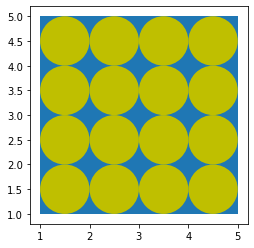

In [4]:
from matplotlib import pyplot as plt

def draw_square():
    square = plt.Polygon([(1, 1), (5, 1), (5, 5), (1, 5)], closed=True)
    return square

def draw_circle(x, y):
    circle = plt.Circle((x, y), radius=0.5, fc='y')
    return circle

if __name__ == '__main__':

    ax = plt.gca()
    s = draw_square()
    ax.add_patch(s)
    y = 1.5
    while y < 5:
        x = 1.5
        while x < 5:
            c = draw_circle(x, y)
            ax.add_patch(c)

            x += 1.0
        y += 1.0

    plt.axis('scaled') 
    plt.show()  

Enter the desired number of points in the Sierpinski Triangle: 450000


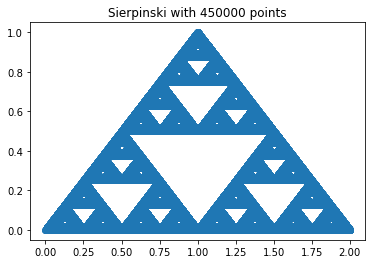

In [2]:
'''
sierpinski.py

Draw Sierpinski Triangle
'''

import random
import matplotlib.pyplot as plt

def transformation_1(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x
    y1 = 0.5*y
    return x1, y1

def transformation_2(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 0.5
    y1 = 0.5*y + 0.5
    return x1, y1

def transformation_3(p):
    x = p[0]
    y = p[1]
    x1 = 0.5*x + 1
    y1 = 0.5*y
    return x1, y1

def get_index(probability):
    r = random.random()
    c_probability = 0
    sum_probability = []
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    for item, sp in enumerate(sum_probability):
        if r <= sp:
            return item
    return len(probability)-1

def transform(p):
    # list of transformation functions
    transformations = [transformation_1, transformation_2, transformation_3]
    probability = [1/3, 1/3, 1/3]
    # pick a random transformation function and call it
    tindex = get_index(probability)
    t = transformations[tindex]
    x, y = t(p)
    return x, y

def draw_sierpinski(n):
    # We start with (0, 0)
    x = [0]
    y = [0]

    x1, y1 = 0, 0
    for i in range(n):
       x1, y1 = transform((x1, y1))
       x.append(x1)
       y.append(y1)
    return x, y

if __name__ == '__main__':
    n = int(input('Enter the desired number of points in the Sierpinski Triangle: '))
    x, y = draw_sierpinski(n)
    # Plot the points
    plt.plot(x, y, 'o')
    plt.title('Sierpinski with {0} points'.format(n))
    plt.show()


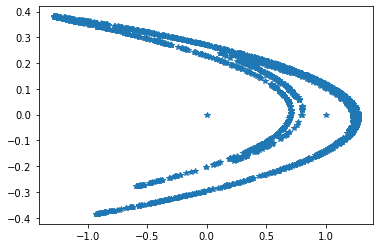

In [9]:
'''
henon.py

Plot 20,000 iterations of the Henon function
'''

import matplotlib.pyplot as plt

def transform(p):
    x,y  = p
    x1 = y + 1.0 - 1.4*x**2
    y1 = 0.3*x

    return x1, y1
     
if __name__ == '__main__':
    p = (0, 0)
    x = [p[0]]
    y = [p[1]]
    for i in range(2000):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])
    plt.plot(x, y, '*')
    plt.show()


<IPython.core.display.Javascript object>


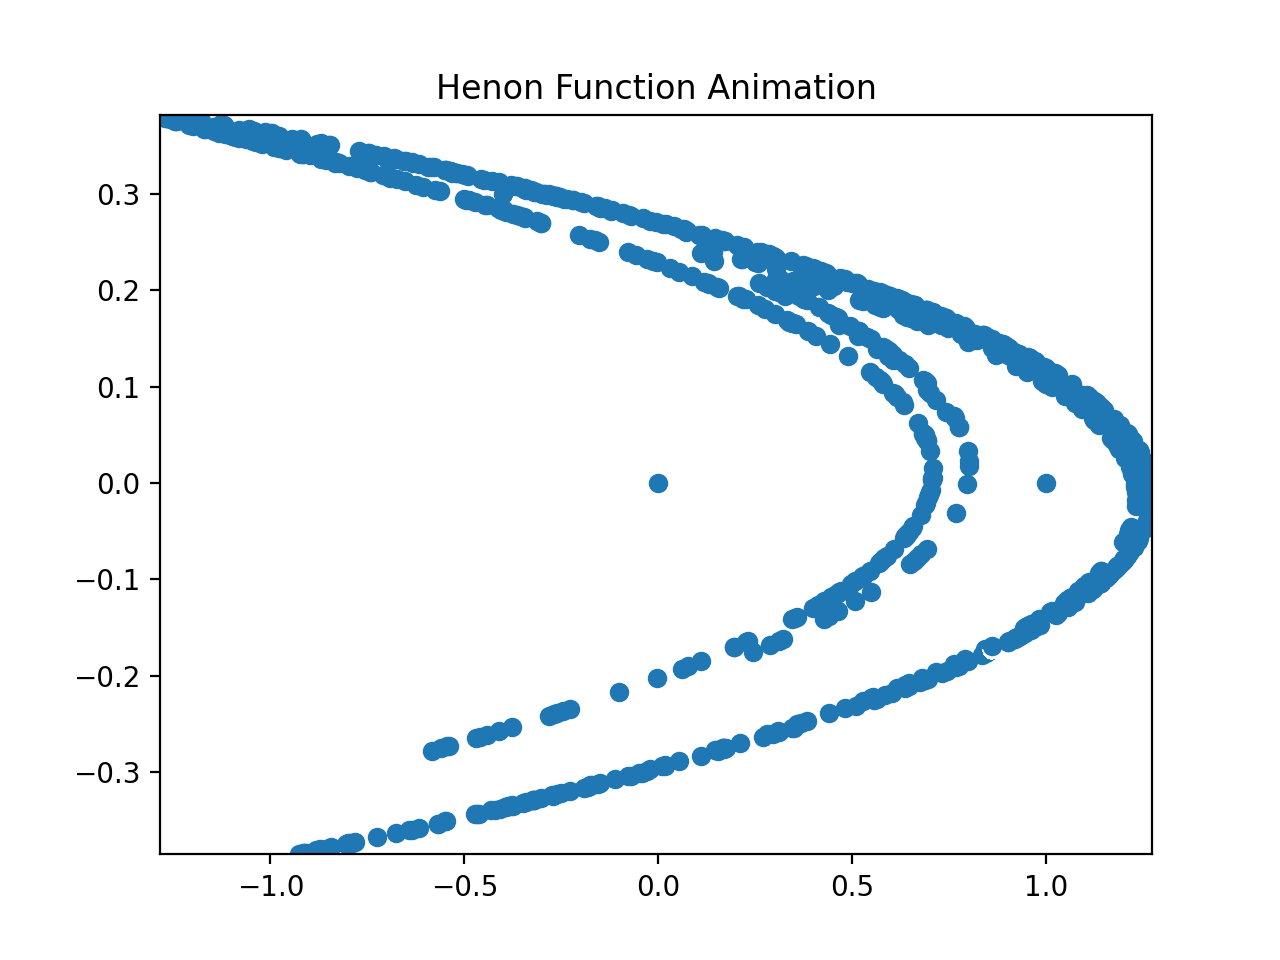

In [22]:
'''
henon_animation.py

Animating 20000 iterations of the Henon function

'''


%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation

def transform(p):
    x,y  = p
    x1 = y + 1.0 - 1.4*x**2
    y1 = 0.3*x

    return x1, y1

def update_points(i, x, y, plot):
    plot.set_data(x[:i], y[:i])
    return plot,
    
if __name__ == '__main__':
    p = (0, 0)
    x = [p[0]]
    y = [p[1]]
    for i in range(10000):
        p = transform(p)
        x.append(p[0])
        y.append(p[1])

    fig = plt.gcf()
    ax = plt.axes(xlim = (min(x), max(x)),
                  ylim = (min(y), max(y)))
    plot = plt.plot([], [], 'o')[0]
    anim = animation.FuncAnimation(fig, update_points,
                                   fargs=(x, y, plot),
                                   frames = len(x),
                                   interval = 25)
    plt.title('Henon Function Animation')
    plt.show()


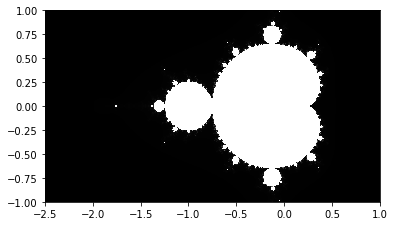

In [2]:
'''
mandelbrot.py

Draw a Mandelbrot set

Using "Escape time algorithm" from:
http://en.wikipedia.org/wiki/Mandelbrot_set#Computer_drawings

Thanks to http://www.vallis.org/salon/summary-10.html for some important
ideas for implementation.

'''


import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Subset of the complex plane we are considering
x0, x1 = -2.5, 1
y0, y1 = -1, 1

def initialize_image(x_p, y_p):
    image = []
    for i in range(y_p):
        x_colors = []
        for j in range(x_p):
            x_colors.append(0)
        image.append(x_colors)
    return image

def mandelbrot_set():
    # Number of divisions along each axis
    n = 400
    # Maximum iterations
    max_iteration=1000
    
    image = initialize_image(n, n)
    
    # Generate a set of equally spaced points in the region
    # above
    dx = (x1-x0)/(n-1)
    dy = (y1-y0)/(n-1)
    x_coords = [x0 + i*dx for i in range(n)]
    y_coords = [y0 + i*dy for i in range(n)]

    for i, x in enumerate(x_coords):
        for k, y in enumerate(y_coords):
            z1 = complex(0, 0)
            iteration = 0
            c = complex(x, y)
            while (abs(z1) < 2  and iteration < max_iteration):
                z1 = z1**2 + c
                iteration += 1
            image[k][i] = iteration
    return image

if __name__ == '__main__':
    image = mandelbrot_set()
    plt.imshow(image, origin='lower', extent=(x0, x1, y0,y1),
               cmap=cm.Greys_r, interpolation='nearest')
    plt.show()
